# Cargar el dataset y borrar datos nulos

In [30]:
import pandas as pd

# ================================
# 1. Cargar el dataset
# ================================
df = pd.read_csv('vgchartz-2024.csv')

# ================================
# 2. Mostrar información inicial
# ================================
print("=== Encabezado del Dataset ===")
print(df.head())
print("\n=== Información del Dataset ===")
print(df.info())
print("\n=== Dimensiones del Dataset ===")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
print("\n=== Valores faltantes (antes de limpieza) ===")
print(df.isnull().sum())

# ================================
# 3. Eliminar columnas innecesarias
# ================================
# Nos quedamos solo con las columnas útiles para el análisis
columns_to_keep = [
    'title', 'console', 'genre', 'publisher', 'developer', 
    'critic_score', 'total_sales', 'na_sales', 'jp_sales', 
    'pal_sales', 'other_sales', 'release_date'
]
df = df[columns_to_keep]

print("\n=== Dataset después de eliminar columnas innecesarias ===")
print(df.head())
print(f"Columnas actuales: {list(df.columns)}")

# ================================
# 4. Eliminar filas con valores nulos
# ================================
df_cleaned = df.dropna()
print(f"\n=== Después de eliminar los valores faltantes: {df_cleaned.shape[0]} filas ===")
print("\n=== Verificación de nulos ===")
print(df_cleaned.isnull().sum())


=== Encabezado del Dataset ===
                                             img                        title  \
0  /games/boxart/full_6510540AmericaFrontccc.jpg           Grand Theft Auto V   
1  /games/boxart/full_5563178AmericaFrontccc.jpg           Grand Theft Auto V   
2                    /games/boxart/827563ccc.jpg  Grand Theft Auto: Vice City   
3  /games/boxart/full_9218923AmericaFrontccc.jpg           Grand Theft Auto V   
4  /games/boxart/full_4990510AmericaFrontccc.jpg    Call of Duty: Black Ops 3   

  console    genre       publisher       developer  critic_score  total_sales  \
0     PS3   Action  Rockstar Games  Rockstar North           9.4        20.32   
1     PS4   Action  Rockstar Games  Rockstar North           9.7        19.39   
2     PS2   Action  Rockstar Games  Rockstar North           9.6        16.15   
3    X360   Action  Rockstar Games  Rockstar North           NaN        15.86   
4     PS4  Shooter      Activision        Treyarch           8.1        15.09

# Preguntas

- ¿Cuáles son los 10 videojuegos más vendidos globalmente?
  
- ¿Cómo ha evolucionado la industria de los videojuegos por año según las ventas?
  
- ¿Cuáles son los géneros más populares y cómo se distribuyen sus ventas?
  
- ¿Qué plataformas tienen más juegos en el top de ventas?
  
- ¿Existe correlación entre las ventas en diferentes regiones (NA, EU, JP, Other)?

## ¿Cuáles son los 10 videojuegos más vendidos globalmente?

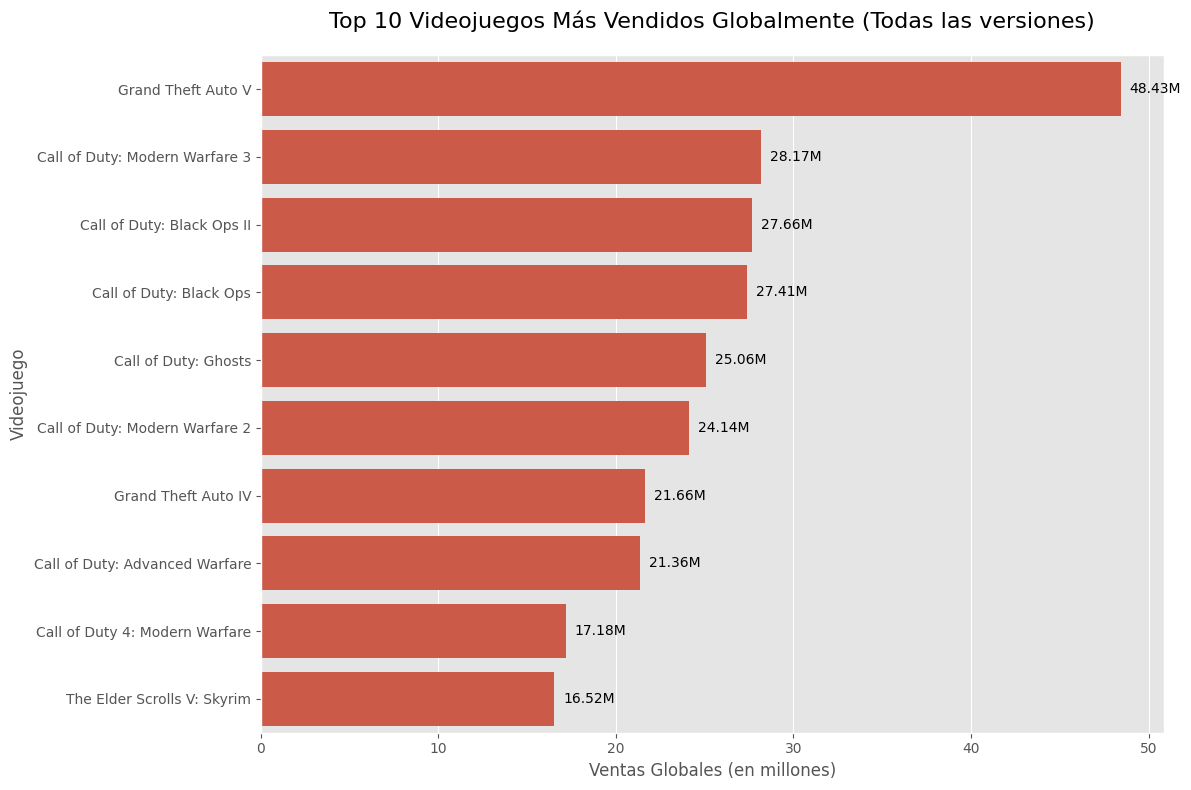

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Configuración del estilo
plt.style.use('ggplot')

# Agrupar por título del juego y sumar las ventas
game_sales = df_cleaned.groupby('title')['total_sales'].sum().reset_index()

# Ordenar por ventas totales y tomar los 10 primeros
top_10 = game_sales.sort_values('total_sales', ascending=False).head(10).reset_index(drop=True)

# Crear la figura
plt.figure(figsize=(12, 8))

# Crear el gráfico de barras horizontales
ax = sns.barplot(x='total_sales', y='title', data=top_10, errorbar=None)

# Añadir etiquetas
for i, v in enumerate(top_10['total_sales']):
    ax.text(v + 0.5, i, f'{v:.2f}M', va='center')

# Personalizar títulos y ejes
plt.title('Top 10 Videojuegos Más Vendidos Globalmente (Todas las versiones)', fontsize=16, pad=20)
plt.xlabel('Ventas Globales (en millones)', fontsize=12)
plt.ylabel('Videojuego', fontsize=12)

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## ¿Cómo ha evolucionado la industria de los videojuegos por año según las ventas?

<Figure size 1400x700 with 0 Axes>

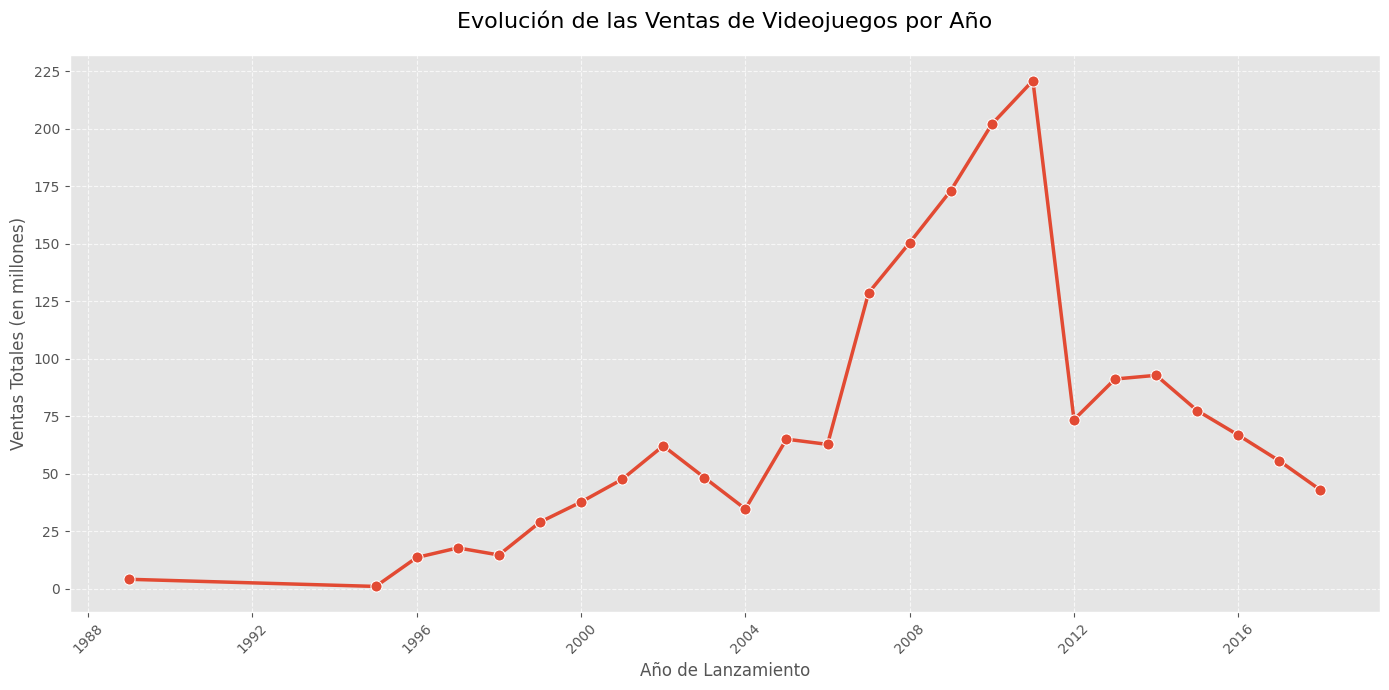


Ventas Totales por Año:
    release_year  total_sales
24          2018        42.98
23          2017        55.62
22          2016        66.84
21          2015        77.49
20          2014        92.83
19          2013        91.22
18          2012        73.54
17          2011       220.94
16          2010       201.97
15          2009       173.12


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# Configuración del estilo
plt.style.use('ggplot')
plt.figure(figsize=(14, 7))

# Usar el dataset limpio
df = df_cleaned.copy()

# Convertir la columna de fecha a datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Extraer el año de la fecha de lanzamiento
df['release_year'] = df['release_date'].dt.year

# Agrupar por año y sumar las ventas totales
yearly_sales = df.groupby('release_year')['total_sales'].sum().reset_index()

# Crear el gráfico de línea
plt.figure(figsize=(14, 7))
sns.lineplot(x='release_year', y='total_sales', data=yearly_sales, 
             marker='o', linewidth=2.5, markersize=8)

# Añadir etiquetas y título
plt.title('Evolución de las Ventas de Videojuegos por Año', 
          fontsize=16, pad=20)
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Ventas Totales (en millones)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Escalar eje X y Y
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))  # Solo años enteros
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=10))      # Escala de ventas optimizada

# Rotar etiquetas del eje X
plt.xticks(rotation=45)

# Ajustar márgenes
plt.tight_layout()

# Mostrar gráfico
plt.show()

# Mostrar tabla
print("\nVentas Totales por Año:")
print(yearly_sales.sort_values('release_year', ascending=False).head(10))
